<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing 1 09/30

In [ ]:
import numpy as np
import pandas as pd

### 누락된 데이터 처리하기

#### Pandas에서 누락된 데이터

In [ ]:
df = pd.DataFrame([[1.0, 2.0, 3.0, 4.0],[5.0, 6.0, None, 8.0], [10.0, 11.0, 12.0, np.nan]])
df.columns = ('A','B','C','D')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


칼럼별 누락된 데이터 개수



In [ ]:
df.isnull().sum()  #  True: 1 False: 0 이므로 sum으로 개수 구하기

,0
A,0
B,0
C,1
D,1


sum()
- numpy 배열에서의 sum : 모든 데이터의 합
- DataFrame에서의 sum :  칼럼별 데이터의 합

결측치의 개수를 알았으니 처리해줘야함

결측치 삭제하기

In [ ]:
df.dropna() # 결측치가 있는 행을 삭제
df.dropna(axis=1) # 결측치가 있는 열을 삭제

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


결측치를 삭제하면 데이터 수가 줄어드는 문제 발생

-> 다른값으로 채워서 사용하는 방법
- fillna()

결측치를 0으로 채우기

In [ ]:
df.fillna(0)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,0.0,8.0
2,10.0,11.0,12.0,0.0


0으로 채우면 왜곡이 생길 수 있음


-> (열)평균으로 대체하기

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


데이터가 숫자가 아닌경우(범주형) 평균으로 대체할 수 없음

-> 최빗값으로 대체

 사이킷런의 SimpleImputer 클래스를 사용하여 보간(inperpolation)하기

# Preprocessing 2 10/02

In [ ]:
df = pd.DataFrame([ ['green', 'L', 10.1, 'yes'], ['green', 'M', 13.5, 'no'], ['red', 'XL', 15.3, 'yes'], ['blue', 'S', 12.7, 'yes']])
df.columns = ['color', 'size', 'price', 'label']
X = df.drop('label', axis=1) #특성행렬 (판다스 데이터프레임)
y = df['label'] #타겟벡터 (판다스 시리즈)

In [ ]:
X

,color,size,price
0,green,L,10.1
1,green,M,13.5
2,red,XL,15.3
3,blue,S,12.7


In [ ]:
y

,label
0,yes
1,no
2,yes
3,yes


문자열을 정수형으로 바꿔줘야함.

LabelEncoder : 훈련이 아닌 데이터만 바꿔주는 목적임

-> 변환기

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

- 추정기 메서드 : fit, predict
- 변환기 메서드 : fit, transform

In [ ]:
encoder.fit(y) # y에 몇종류의 값이 출현하는지 분석

LabelEncoder()

In [ ]:
encoder.classes_ # y에 [no,yes]가 있다

array(['no', 'yes'], dtype=object)

먼저 나온 no를 0으로,    yes를 1로 바꾸자..

근데 데이터에는 yes가 먼저나왔는데 왜 no가 먼저인가.. -> 알파벳순

In [ ]:
encoder.transform(y) # yes ->1 no ->0으로 바뀜

array([1, 0, 1, 1])

fit과 transform을 한번에 해주는 메서드
- fit_transform()

In [ ]:
encoder.fit_transform(y)

array([1, 0, 1, 1])

만약 0과 1을 지정해서 배정해주고 싶다면..? -> map을 사용

In [ ]:
d = {'no': 1, 'yes': 0}

In [ ]:
y.map(d)

,label
0,0
1,1
2,0
3,0


#### X를 변환시키기

- green, red, blue는 순서가 없음 -> 명목형
- S, M, L, XL 는 순서가 있음 -> 순서형


-> 둘다 범주형이지만 다름

In [ ]:
size_d = {'XS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4}
X['size'] = X['size'].map(size_d)
X

,size,price,color_blue,color_green,color_red
0,NaN,10.1,False,True,False
1,NaN,13.5,False,True,False
2,NaN,15.3,False,False,True
3,NaN,12.7,True,False,False


색깔의 경우 순서가 없으므로 **가변수**화

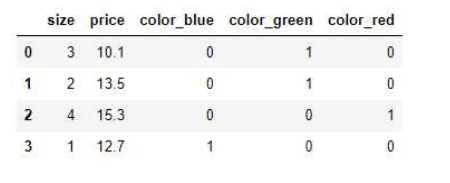

값들 사이의 크다, 작다 개념 없앰

#### 원-핫인코딩
명목형 범주를 0,1값을 갖게하여 순서가 없게

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X

,size,price,color_blue,color_green,color_red
0,NaN,10.1,False,True,False
1,NaN,13.5,False,True,False
2,NaN,15.3,False,False,True
3,NaN,12.7,True,False,False


색깔이 알아서 바뀜.


* 만약 size에 대해서 이전에 데이터를 정수로 바꿔주지 않았다면 size도 원핫 인코딩이 적용됨

# 와인 데이터

## 데이터 불러오기
1. Scikit-learn 데이터셋 로더
2. UCI Machine Learning Repository 이용
3. 직접 다운로드한 파일

## 1. Scikit-learn 데이터셋 로더

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### 위 정보로 x, y 찾기

In [ ]:
X = wine.data
Y = wine.target

## 2. UCI Machine Learning Repository 이용

- loc :
- iloc : numpy문법저럼 DataFrame에 슬라이싱 할 수 있게 해줌
-  [:,0]에서 0이 칼럼명이 아니라 0번 인덱스를 말하게

In [ ]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine3 = pd.read_csv(path, header=None)
wine3.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
 'Proanthocyanins', 'Color intensit', 'Hue',
 'OD280/OD315 of diluted wines', 'Proline']
wine3.info() #결측치 없음
X = wine3.iloc[:, 1:].values #1번 칼럼부터 끝까지 특성
y = wine3.iloc[:, 0].values #0번 칼럼이 타겟

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensit                178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## 3. 직접 다운로드한 파일

In [ ]:
%pwd

'/content'

In [ ]:
wine = pd.read_csv('/content/wine.data', header=None)

In [ ]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 데이터 분할

데이터를 훈련용데이터, 테스트용 데이터로 나누는것.
- sklearn.model_selection.train_test_split 함수 이용

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = wine.iloc[:,0]
X = wine.iloc[:,1:]

In [ ]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.3, random_state=102, stratify =y)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
y_train.shape

(124,)

In [ ]:
X_test.shape

(54, 13)

## 데이터 변환

### 스케일 맞추기
1. 0~1 사이로 맞추기
2. 평균이 0 표준편차는 1로 만들기 -> 표준화

#### 표준화 함수
- sklearn.preprocessing.StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_std = sc.fit_transform(X_train)

- 테스트 데이터도 표준화 해줘야함
- **주의** 테스트데이터는 따로 fit 하지않고 훈련데이터와 똑같은 공식을 사용해야함

In [ ]:
X_test_std = sc.transform(X_test) # fit 뺴고 transform만 해준다.....